In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
raw_data = pd.read_csv("athlete_events.csv")
raw_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
print(raw_data.isna().sum())
print("The total data is: ", raw_data.values.shape)

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64
The total data is:  (271116, 15)


What we know that, there are lots of missing values in the dataset. In the dataset, Age, Height, Weight are missing, so we could fill the data using different ways, such as mean or median. In the columns "Medal", there are also lots of missing values which mean athletes didn't get the medals. 
In the first, we need to pose some Questions: 
Which country get the highest number of medal in the all games?
Does these factors: Height, Weight, sex and ages affect athletes getting medals? 
We assume that the height and weight of those who won medals reached a balance.

In [4]:
# first we want to roughly check which countries get the highest medals in the all games. 
# we also notice that, Soviet Union is no longer exist, so we need to drop these values. 
w_index = ['Team', 'NOC', 'Medal']
w_data = raw_data[w_index].dropna()
w_data = w_data[~w_data['Team'].isin(['Soviet Union'])]
w_data

,Team,NOC,Medal
3,Denmark/Sweden,DEN,Gold
37,Finland,FIN,Bronze
38,Finland,FIN,Bronze
40,Finland,FIN,Bronze
41,Finland,FIN,Bronze
...,...,...,...
271048,Netherlands,NED,Bronze
271049,Netherlands,NED,Gold
271082,Poland,POL,Bronze
271102,Russia,RUS,Bronze


In [5]:
# draw the world map. 
!pip3 install <country_converter>
import plotly.express as px
import country_converter as coco

# pre-processing the dataset. 

group_data = w_data.groupby("NOC").agg(['count']).reset_index()

group_data.columns = ['Country Abbreviation', 'Team count', 'medal count']

group_data


/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `pip3 install <country_converter>'


,Country Abbreviation,Team count,medal count
0,AFG,2,2
1,AHO,1,1
2,ALG,17,17
3,ANZ,29,29
4,ARG,274,274
...,...,...,...
144,VIE,4,4
145,WIF,5,5
146,YUG,390,390
147,ZAM,2,2


In [12]:
fig = px.choropleth(group_data, 
                    locations="Country Abbreviation",
                    color="medal count", 
                    color_continuous_scale=px.colors.sequential.Plasma
                   ,width=800, height=400)


fig.update_layout(title_text = 'The number of medals amongst countries in the world')

fig.show()

In [7]:
# Next we want to check the details factors. 
f_index = ['Age','Height','Weight','Medal']
f_data = raw_data[f_index]
f_data

,Age,Height,Weight,Medal
0,24.0,180.0,80.0,NaN
1,23.0,170.0,60.0,NaN
2,24.0,NaN,NaN,NaN
3,34.0,NaN,NaN,Gold
4,21.0,185.0,82.0,NaN
...,...,...,...,...
271111,29.0,179.0,89.0,NaN
271112,27.0,176.0,59.0,NaN
271113,27.0,176.0,59.0,NaN
271114,30.0,185.0,96.0,NaN


In [8]:
# we define that, if an athlete got a medal, we set which values as 'Yes', else set 'No'
import math

is_medal = f_data['Medal'].fillna(0)
for i in range(len(is_medal)):
    if is_medal[i] == 0:
        is_medal[i] = 'No'
    else:
        is_medal[i] = 'Yes'

f_data['is_medal'] = is_medal         
            
f_data = f_data[['Age', 'Height', 'Weight', 'is_medal']].dropna(axis=0,how='any')         
f_data

,Age,Height,Weight,is_medal
0,24.0,180.0,80.0,No
1,23.0,170.0,60.0,No
4,21.0,185.0,82.0,No
5,21.0,185.0,82.0,No
6,25.0,185.0,82.0,No
...,...,...,...,...
271111,29.0,179.0,89.0,No
271112,27.0,176.0,59.0,No
271113,27.0,176.0,59.0,No
271114,30.0,185.0,96.0,No


<AxesSubplot:title={'center':'The relationship amongst athletes Acquired medals and their physiological features '}, xlabel='Height', ylabel='Weight'>

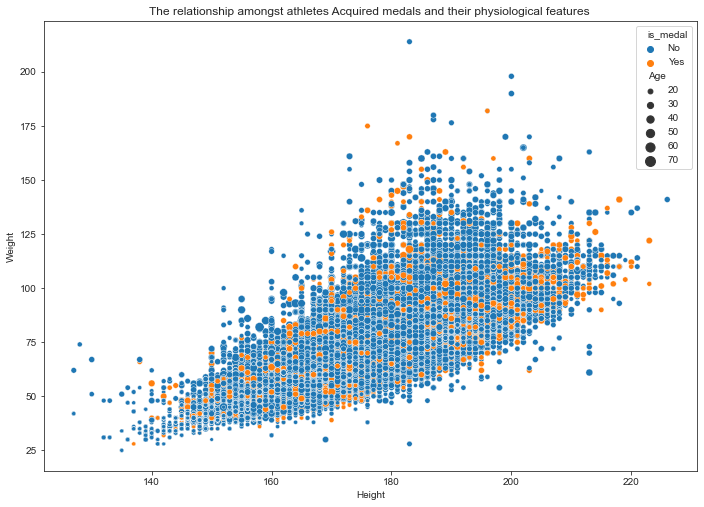

In [9]:
# draw scatter plot using seaborn 
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax.set_title("The relationship amongst athletes Acquired medals and their physiological features ")
sns.scatterplot(data = f_data, x='Height', y='Weight',
               hue = 'is_medal', size='Age', sizes=(10, 100)
               )

In [10]:
# The last, we want to using BMI index to group those who got medals. 

def BMI_conveter(mass, height):
    bmi = mass / np.square(height/100)
    global result
    if bmi <= 18.4:
        result = 'Underweight'
    if bmi >= 18.5 and bmi <= 24.9:
        result = 'Normal'
    if bmi >= 25.0 and bmi <= 29.9:
        result = 'Overweight'
    if bmi >= 30:
        result = 'Obesity'       
    
    return result


winners = f_data[f_data['is_medal'].isin(['Yes'])]
height = winners['Height'].values.tolist()
weight = winners['Weight'].values.tolist()


re = []
for i in range(len(height)):
    temp = BMI_conveter(weight[i], height[i])
    re.append(temp)
    

pie_data = pd.DataFrame(np.column_stack((height,weight,re)), columns=['height', 'weight', 'BMI Index'])
group_pie = pie_data.groupby('BMI Index').agg(['count']).reset_index()
group_pie.columns = ['BMI Index','Counts_1', 'Counts_2']

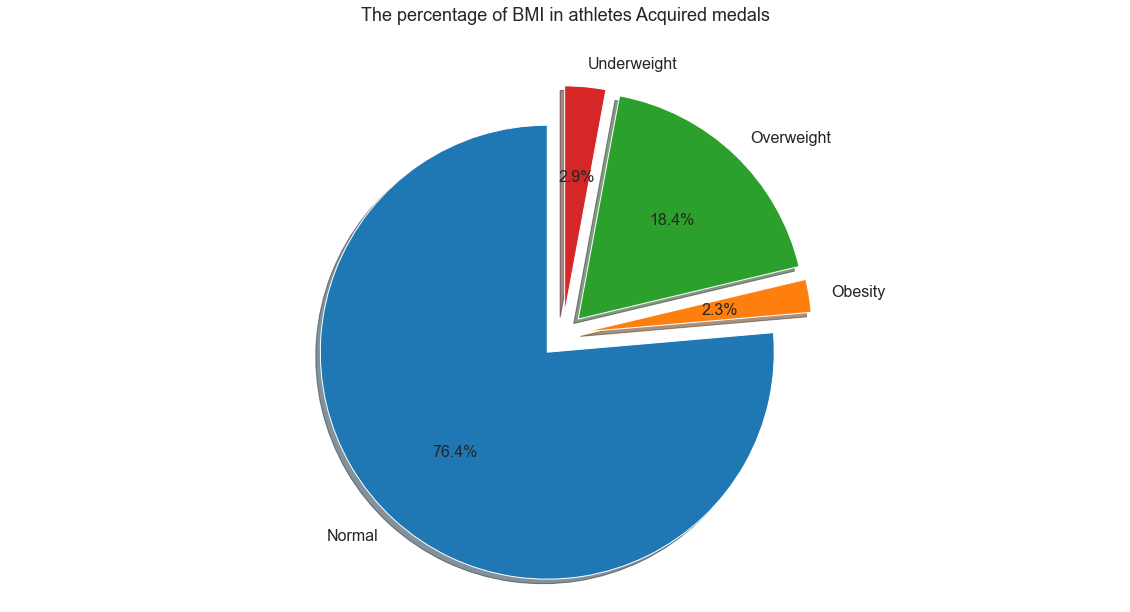

In [11]:
# Draw the pie chart 
labels = group_pie['BMI Index'].values.tolist()
sizes = group_pie['Counts_1'].values.tolist()

explode = (0.1, 0.1, 0.1, 0.1) 

fig, ax = plt.subplots(figsize=(20, 10))
ax.pie(sizes, explode=explode,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 16})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('The percentage of BMI in athletes Acquired medals', fontsize=18, y=1.1, pad=-14)
plt.show()